In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\DATA\feb 2013\daily_balance_sample.txt",sep="\t")
data.head()

,SUBSCRIPTION_ID,REPORT_DATE,DAILY_BALANCE
0,659647043,2012-06-01,8.93
1,371690914,2012-06-01,59.14
2,141386731,2012-06-01,107.72
3,672517193,2012-06-01,6.08
4,159544508,2012-06-01,30.36


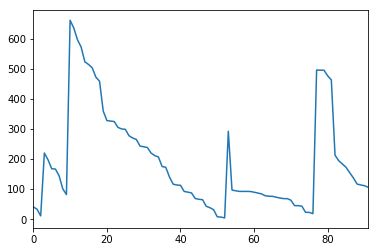

In [3]:
data=data.sort_values(['SUBSCRIPTION_ID','REPORT_DATE'])
data=data.reset_index(drop=True)
data.loc[(data['SUBSCRIPTION_ID']==16294216),'DAILY_BALANCE'].plot()
#data.loc[(data['SUBSCRIPTION_ID']==371690914),'DAILY_BALANCE'].plot()
#data.loc[(data['SUBSCRIPTION_ID']==141386731),'DAILY_BALANCE'].plot()


In [5]:
data=data.ix[:10000,:]

In [6]:
timesteps=50
pred=[]
target_cont=[]
target_bin=[]
for i in range(len(data)-timesteps-1):
    if data.ix[i,'SUBSCRIPTION_ID']==data.ix[i+timesteps,'SUBSCRIPTION_ID']:
        pred.append(data.ix[i:i+timesteps-1,'DAILY_BALANCE'])
        target_cont.append(data.ix[i+timesteps,'DAILY_BALANCE'])
        target_bin.append((data.ix[i+timesteps,'DAILY_BALANCE'] > 
                           data.ix[i+timesteps-1,'DAILY_BALANCE']).astype(int))
        
pred=np.array(pred)
target_cont=np.array(target_cont)
target_bin=np.array(target_bin)      

In [7]:
print pred.shape
print target_cont.shape
print target_bin.shape

(4550L, 50L)
(4550L,)
(4550L,)


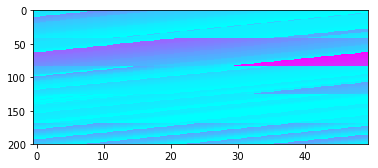

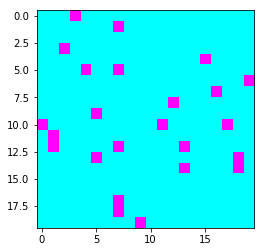

In [10]:
import matplotlib.pyplot as plt
plt.imshow(pred[:200,:],aspect=0.1,cmap='cool')
plt.show()

plt.imshow(target_bin[:20*20].reshape(-1,20),aspect=1,cmap='cool')



In [11]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(timesteps,))
x = Dense(10,activation='relu')(input1)
x = Dense(5,activation='relu')(x)
prediction = Dense(1,activation='sigmoid')(x)

model_1 = Model(input=input1, output=prediction)
model_1.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_1.summary()

model_1.fit(pred,target_bin,batch_size=1000, nb_epoch=50, verbose=1)

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--',
         model_1.history.epoch, model_1.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')
print ("loss:",model_1.history.history['loss'][-1],"accuray:",model_1.history.history['acc'][-1])
print ("test loss:",model_1.history.history['val_loss'][-1],"test accuray:",model_1.history.history['val_acc'][-1])


Using Theano backend.
Using gpu device 0: Quadro 2000M (CNMeM is enabled with initial size: 95.0% of memory, cuDNN not available)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 50)            0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            510         input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 5)             55          dense_1[0][0]                    
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 1)             6           dense_2[0][0]                    
Total params: 571
_________________________________________________________________________

KeyboardInterrupt: 